### Plotar av normalfördelningen
Först en plot av täthetsfunktionen av normalfördelningen.
$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x-\mu}{2\sigma^2}} $


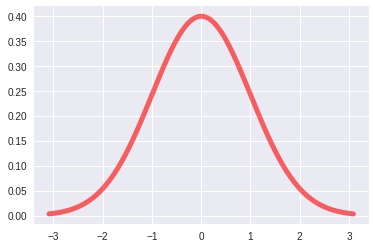

In [24]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.001),
                norm.ppf(0.999), 1000)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')


Vi karaktäriserar sedan ett stickprov omfattande 1000 dragningar ur $\mathcal{N}(0,1)$ 

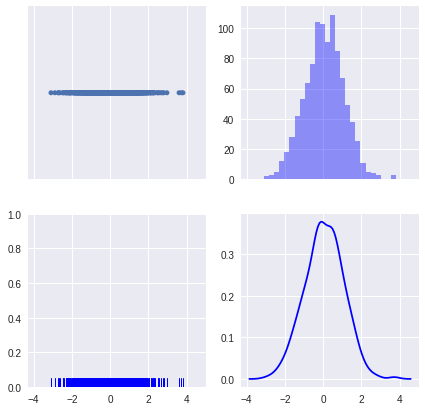

In [10]:
import pandas as pd
import seaborn as sns

stickprov = norm.rvs(size=1000)
data = pd.DataFrame(np.transpose(stickprov),columns=["Stickprov"])
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.stripplot(data,ax=axes[0, 0])
sns.distplot(data, kde=False, color="b", ax=axes[0, 1])
sns.distplot(data, kde=False, hist=False, rug=True, color="b", ax=axes[1, 0])
sns.distplot(data, hist=False, color="b", ax=axes[1, 1])



### Undersökning a n-1 i estimering av standardavvilkelse. 

Vi tar $n$ värden ur $\mathcal{N}(0,1)$ och beräknar varians över 100 sådana stickprov. Ser det rimligt ut att variansen bäst estimeras av $V(x)=\frac{1}{n-1}\sum_{i=1}^n(x-\bar{x})^2$?

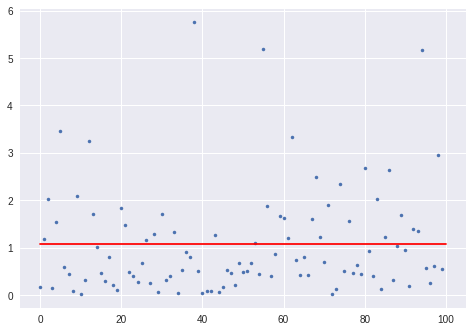

In [23]:
n=3
kvadrat_residyer,summa = [],0.0
for ix in range(100):
  stickprov = norm.rvs(size=n)
  var_est = np.sum((stickprov-np.mean(stickprov))**2)/(n-1)
  kvadrat_residyer.append(var_est)
  summa += var_est
medel = summa/100
fig, ax = plt.subplots(1, 1)
ax.plot(range(100), kvadrat_residyer,'.')
ax.plot([0,100], [medel,medel],'r-')
    